# ETL - Merge all individual .csv files into 1 .csv file

Scraped data is stored as individual .csv files (1 per feature).  Here we concatenate/merge those files and save 1 file that can be loaded into GitHub and used for the rest of the project

### NOTES:

- (+) Crime data is missing data from Vermont.
- National divorce rate is applied to each state.
- Home ownership there is more data on National (start 1976-2020) than on individual states (1984-2020).
- (++) Minimum wage: originally 54 states available. Dropped: 'Guam', 'Puerto Rico', 'U.S. Virgin Islands'
- (+++) Minimum wage:  removed year 1968 and 1969
- Minimum wage missing:   National.   what should we use for it? average from all states or the Federal Min Wage?
- (++++) Average Wage Indexing: removed data ealier than 1970 (1951-1969).  Applied same data to all states.
- Poverty rate:  missing data for District of Columbia.  Removed data ealier than 1970 (1967-1969).

#### Summary of data

|Variable|Nbr of states|Year Start|Year End|
|:---|:---:|:---:|:---:|
|Population|52|1970|2026
|Education|52|1970|2026|
|Welfare|52|1970|2026|
|Crime|51+|1986|2019|
|Unemployment|52|1986|2019|
|Divorce|52|1960|2019|
|Home ownership|52|1984| 2020|
|Minimum Wage|51++|1970+++|2020|
|CPI - Consumer Price Index|51++|1970+++|2020|
|Average Wage Indexing|52|1970++++|2020|
|**Poverty Rate**|51|1967|2019|




In [1]:
# Import dependencies
import pandas as pd
import numpy as np

In [2]:
# Helper functions
import math
import matplotlib.pyplot as plt

# Generate boxplots for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def boxplots(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].boxplot(df[col])
            axs[j].set_title(col)
        else:
            axs[i][j].boxplot(df[col])
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

# Generate histograms with 20 bins for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def histograms(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].hist(df[col], alpha=0.5, bins=20)
            axs[j].set_title(col)
        else:
            axs[i][j].hist(df[col], alpha=0.5, bins=20)
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    
def lineplots(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].plot(df[col])
            axs[j].set_title(col)
        else:
            axs[i][j].plot(df[col])
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    
def qc_data(df):
    print('---  DTYPES  ---')
    print(df.dtypes)
    print('---  STATISTICS  ---')
    print(df.describe())
    print('---  TOTAL NAs  ---')
    print(df.isna().sum())
    print('---  YEARS COVERED  ---')
    print(f"Start: {df['year'].min()}")
    print(f"End: {df['year'].max()}")
    if 'state' in df.columns:
        print('---  LIST OF STATES  ---')
        print(f"Number states: {df['state'].value_counts().count()}")
        print(df['state'].value_counts(sort=True).sort_index())

## Start with welfare_education data

In [3]:
# Load welfare_education data
path = "Resources/"
filename = "welfare_education_1970-2026.csv"
path_filename = path + filename

welfare_df = pd.read_csv(path_filename, delimiter=",")
dataset_df = welfare_df.copy()
welfare_df

,year,state,population_million,education_million,welfare_million
0,1970,National,203.302,56456.0,18738.8
1,1971,National,205.515,63469.0,27364.3
2,1972,National,207.752,71351.0,30594.3
3,1973,National,210.013,75849.0,28944.9
4,1974,National,212.299,81440.0,34816.4
...,...,...,...,...,...
2959,2022,Wyoming,0.587,2759.1,347.9
2960,2023,Wyoming,0.589,2745.8,349.3
2961,2024,Wyoming,0.591,2755.2,351.3
2962,2025,Wyoming,0.594,2793.8,354.9


### Quality check data

In [4]:
# Use helper function
qc_data(dataset_df)

---  DTYPES  ---
year                    int64
state                  object
population_million    float64
education_million     float64
welfare_million       float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03
std      16.454726           37.865413       1.032112e+05     6.274371e+04
min    1970.000000            0.303000       1.199000e+02     1.280000e+01
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02
50%    1998.000000            3.821500       4.919800e+03     1.313950e+03
75%    2012.000000            6.632750       1.372025e+04     3.561275e+03
max    2026.000000          343.192000       1.533802e+06     1.803767e+06
---  TOTAL NAs  ---
year                  0
state                 0
population_million    0
education_million     0
welfare

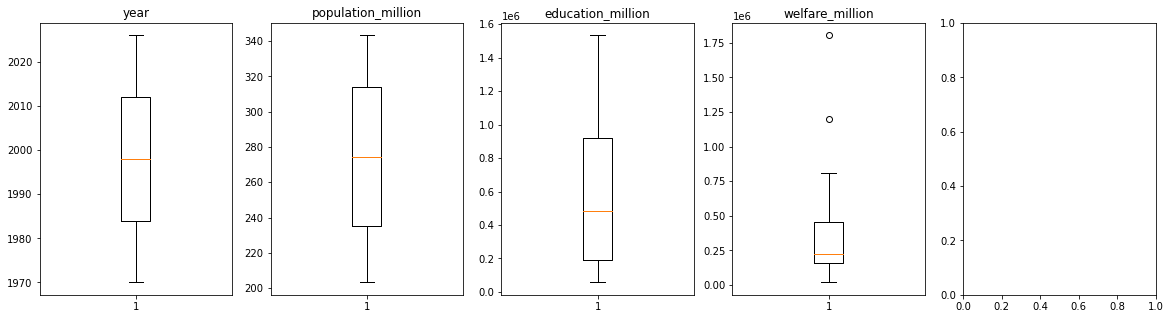

In [5]:
boxplots(dataset_df.loc[dataset_df['state']=='National'])

## Load and check crime_rate.csv

In [6]:
# Load crime data
path = "Resources/"
filename = "crime_rate.csv"
path_filename = path + filename

crime_df = pd.read_csv(path_filename, delimiter=",")
crime_df

,year,state,crime_rate
0,1986,Maryland,833.0
1,1987,Maryland,767.8
2,1988,Maryland,806.8
3,1989,Maryland,855.4
4,1990,Maryland,919.0
...,...,...,...
1763,2015,West Virginia,347.5
1764,2016,West Virginia,362.7
1765,2017,West Virginia,361.2
1766,2018,West Virginia,299.9


In [7]:
# Use helper function
qc_data(crime_df)

---  DTYPES  ---
year            int64
state          object
crime_rate    float64
dtype: object
---  STATISTICS  ---
              year   crime_rate
count  1768.000000  1768.000000
mean   2002.500000   461.192025
std       9.813484   284.851796
min    1986.000000    51.300000
25%    1994.000000   277.375000
50%    2002.500000   407.550000
75%    2011.000000   572.550000
max    2019.000000  2921.800000
---  TOTAL NAs  ---
year          0
state         0
crime_rate    0
dtype: int64
---  YEARS COVERED  ---
Start: 1986
End: 2019
---  LIST OF STATES  ---
Number states: 52
Alabama                 34
Alaska                  34
Arizona                 34
Arkansas                34
California              34
Colorado                34
Connecticut             34
Delaware                34
District of Columbia    34
Florida                 34
Georgia                 34
Hawaii                  34
Idaho                   34
Illinois                34
Indiana                 34
Iowa               

In [8]:
# Find missing state in crime data
state_list = dataset_df['state'].unique().tolist()
for i in crime_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

[]

## Merge on year + state,  ID missing data

In [9]:
dataset_df = pd.merge(welfare_df, crime_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])
dataset_df.loc[dataset_df['state']=='Vermont']

,year,state,population_million,education_million,welfare_million,crime_rate
2622,1970,Vermont,0.445,130.3,19.5,NaN
2623,1971,Vermont,0.451,144.4,30.5,NaN
2624,1972,Vermont,0.457,178.9,37.3,NaN
2625,1973,Vermont,0.464,160.5,42.1,NaN
2626,1974,Vermont,0.470,188.0,36.2,NaN
2627,1975,Vermont,0.477,212.8,45.6,NaN
2628,1976,Vermont,0.484,236.8,76.6,NaN
2629,1977,Vermont,0.490,248.3,123.5,NaN
2630,1978,Vermont,0.497,261.4,118.3,NaN
2631,1979,Vermont,0.504,303.4,114.4,NaN


## Load unemployment_rate.csv

In [10]:
# Load crime data
path = "Resources/"
filename = "unemployment_rate.csv"
path_filename = path + filename

unemployment_df = pd.read_csv(path_filename, delimiter=",")
unemployment_df

,unemployment_rate,state,year
0,7.786562,National,1976
1,7.132505,National,1977
2,6.134198,National,1978
3,5.923827,National,1979
4,7.255717,National,1980
...,...,...,...
2335,5.100000,North Carolina,2016
2336,4.500000,North Carolina,2017
2337,4.000000,North Carolina,2018
2338,3.800000,North Carolina,2019


In [11]:
# replace "District of Colombia"
unemployment_df = unemployment_df.replace(to_replace="District of Colombia",
                        value="District of Columbia")

In [12]:
# Use helper function
qc_data(unemployment_df)

---  DTYPES  ---
unemployment_rate    float64
state                 object
year                   int64
dtype: object
---  STATISTICS  ---
       unemployment_rate         year
count        2340.000000  2340.000000
mean            5.938875  1998.000000
std             2.081335    12.989949
min             2.100000  1976.000000
25%             4.400000  1987.000000
50%             5.600000  1998.000000
75%             7.200000  2009.000000
max            17.300000  2020.000000
---  TOTAL NAs  ---
unemployment_rate    0
state                0
year                 0
dtype: int64
---  YEARS COVERED  ---
Start: 1976
End: 2020
---  LIST OF STATES  ---
Number states: 52
Alabama                 45
Alaska                  45
Arizona                 45
Arkansas                45
California              45
Colorado                45
Connecticut             45
Delaware                45
District of Columbia    45
Florida                 45
Georgia                 45
Hawaii                  45
Idah

## Merge on year and state. ID unmatched data

In [13]:
dataset_df = pd.merge(dataset_df, unemployment_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])


In [14]:
qc_data(dataset_df)

---  DTYPES  ---
year                    int64
state                  object
population_million    float64
education_million     float64
welfare_million       float64
crime_rate            float64
unemployment_rate     float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01   
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02   
50%    1998.000000            3.821500       4.919800e+03     1.313950e+03   
75%    2012.000000            6.632750       1.372025e+04     3.561275e+03   
max    2026.000000          343.192000       1.533802e+06     1.803767e+06   

        crime_rate  unemployment_ra

## Load divorce rate


In [15]:
# Load crime data
path = "Resources/"
filename = "divorce_rate_per_1000_people.csv"
path_filename = path + filename

divorce_df= pd.read_csv(path_filename, delimiter=",")

## Fix column names
divorce_df.columns = ['year','divorce_rate_per_1000_people']
divorce_df

,year,divorce_rate_per_1000_people
0,1960,2.2000
1,1961,2.2600
2,1962,2.3200
3,1963,2.3800
4,1964,2.4400
5,1965,2.5000
6,1966,2.6750
7,1967,2.8500
8,1968,3.0250
9,1969,3.2000


In [16]:
# QC data
qc_data(divorce_df)

---  DTYPES  ---
year                              int64
divorce_rate_per_1000_people    float64
dtype: object
---  STATISTICS  ---
              year  divorce_rate_per_1000_people
count    60.000000                     60.000000
mean   1989.500000                      3.900167
std      17.464249                      0.894646
min    1960.000000                      2.200000
25%    1974.750000                      3.200000
50%    1989.500000                      3.950000
75%    2004.250000                      4.700000
max    2019.000000                      5.300000
---  TOTAL NAs  ---
year                            0
divorce_rate_per_1000_people    0
dtype: int64
---  YEARS COVERED  ---
Start: 1960
End: 2019


In [ ]:
boxplots(divorce_df)

In [ ]:
histograms(divorce_df)

## Merge divorce rate.  Matchin on "year" only will assign the same rate to each state

In [ ]:
dataset_df = pd.merge(dataset_df, divorce_df, how='left',
                      left_on='year', right_on='year')


In [ ]:
qc_data(dataset_df)

## Load homeownership rate

In [ ]:
# Load crime data
path = "Resources/"
filename = "homeownership_rate.csv"
path_filename = path + filename

homeownership_df= pd.read_csv(path_filename, delimiter=",")
homeownership_df

In [ ]:
# QC check 
qc_data(homeownership_df)

In [ ]:
homeownership_df.loc[homeownership_df.state=='New York'].describe()

In [ ]:
homeownership_df.loc[homeownership_df.state=='National'].describe()

## Merge homeownership

In [ ]:
dataset_df = pd.merge(dataset_df, homeownership_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])

In [ ]:
qc_data(dataset_df)

## Load Minimum_Wage.csv

In [ ]:
# Load crime data
path = "Resources/"
filename = "minimum_wage_effective_1968-2020.csv"
path_filename = path + filename

min_wage_df= pd.read_csv(path_filename, delimiter=",")
min_wage_df

In [ ]:
qc_data(min_wage_df)

In [ ]:
# Find additional state in min_wage
state_list = min_wage_df['state'].unique().tolist()
for i in dataset_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

In [ ]:
# Find missing state in min_wage
state_list = dataset_df['state'].unique().tolist()
for i in min_wage_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

In [ ]:
## Drop Guam, Puerto Rico and US Virgin Islands
min_wage_df = min_wage_df.drop(min_wage_df[min_wage_df['state']
                            .isin(['Guam', 'Puerto Rico', 'U.S. Virgin Islands'])].index)

In [ ]:
## Remove data before 1970 and nominal value column
min_wage_df = min_wage_df.drop(min_wage_df[min_wage_df.year< 1970].index)
min_wage_df = min_wage_df.drop(columns='minimum_wage_2020_nominal')

In [ ]:
qc_data(min_wage_df)

## Merge Minimum wage data

In [ ]:
dataset_df = pd.merge(dataset_df, min_wage_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])
qc_data(dataset_df)

## Load average_wage_indexing

In [ ]:
# Load awi
path = "Resources/"
filename = "average_wage_indexing_1951-2020.csv"
path_filename = path + filename

awi_df= pd.read_csv(path_filename, delimiter=",")
awi_df

In [ ]:
# Drop unnecessary columns and rows
awi_df = awi_df.drop(columns='Annual_change')
awi_df = awi_df.drop(awi_df[awi_df.Year<1970].index, axis=0)

awi_df.columns = ['year','avg_wage_index']
qc_data(awi_df)

In [ ]:
awi_df.avg_wage_index = awi_df.avg_wage_index.str.replace(',','').astype(np.float64)
awi_df.dtypes

## Merge AWI dataframe

In [ ]:
dataset_df = pd.merge(dataset_df, awi_df, how='left', 
                      left_on='year', right_on='year')
qc_data(dataset_df)

## Load poverty_rates.csv

In [ ]:
# Load poverty rates
path = "Resources/"
filename = "poverty_rates_1967-2014.csv"
path_filename = path + filename

poverty_rate_df= pd.read_csv(path_filename, delimiter=",")
poverty_rate_df = poverty_rate_df.drop(poverty_rate_df[poverty_rate_df.year<1970].index)
poverty_rate_df

In [ ]:
qc_data(poverty_rate_df)

In [ ]:
# Find missing state in poverty_rate
state_list = dataset_df['state'].unique().tolist()
for i in poverty_rate_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

## Merge Poverty_rate

In [ ]:
dataset_df = pd.merge(dataset_df, poverty_rate_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])

In [ ]:
qc_data(dataset_df)

## Store into a csv,  drop the index when saving

In [ ]:
dataset_df.to_csv('Resources/dataset.csv', index = False, index_label=False)